# Reducción de dimensionalidad

En este _notebook_ vamos a ver dos algoritmos de reducción de dimensionalidad: PCA y T-SNE.

## PCA

PCA es un algoritmo clásico de reducción de dimensionalidad que se basa en la **descomposición de valores singulares** de una matriz. Vamos a ver cómo usar la implementación de este algoritmo en Scikit Learn.

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()

# Recordemos que el dataset original tiene 4 features
X = iris['data']
y = iris['target']

# Estas son las features
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
# Ahora vamos a reducir la dimensionalidad

# Queremos reducir a dos dimensiones
pca = PCA(n_components=2)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_2D = pca.fit_transform(X)

Así pasamos de un dataset de 4 dimensiones a uno de 2 dimensiones, y por supuesto, esta versión se puede graficar.

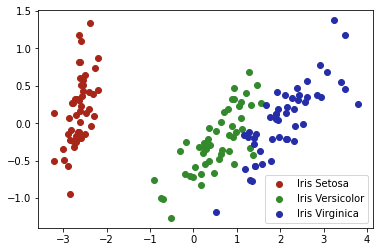

In [3]:
import matplotlib.pyplot as plt

cmap_bold = ['#a72618', '#34892d', '#262ea7']

plt.scatter(X_2D[y==0, 0], X_2D[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X_2D[y==1, 0], X_2D[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X_2D[y==2, 0], X_2D[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

Como vemos, esta representación se parece en algo a cuando solo graficamos el largo y ancho del pétalo, pero con las flores versicolor y virgínica un poco más mezclada. Sin embargo, estamos mostrando la información de un _dataset_ de cuatro dimensiones en un plano de dos dimensiones. **Ojo**: uno puede entrenar un modelo usando esta versión, ya que es más liviano que entrenar un modelo con 4 _features_, y además uno podría ver la frontera de decisión.

### Varianza de cada componente

Para ver la varianza de cada componente podemos hacer lo siguiente.

In [4]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Así, la primera componente "guarda" un 92% de la varianza total, y la segunda componente guarda 5%. Veamos que pasa al hacer reducción de dimensionalidad de 3 dimensiones.

In [5]:
# Queremos reducir a tres dimensiones
pca = PCA(n_components=3)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_3D = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

Como vemos, la tercera componente guarda 1.7% de la varianza del _dataset_ original. ¿Cómo podemos escoger el número de componentes sobre cierto _threshold_? Se le puede indicar al constructor de laa clase `PCA`.

In [6]:
# Queremos reducir a las dimensiones suficientes para preservar un 95% de la varianza al menos
pca = PCA(n_components=0.95)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_PCA = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Y así nos quedamos con dos dimensiones. Ahora vamos a graficar el _dataset_ MNIST con este método.

In [19]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

# Tomamos los primeros 2000 elementos para que tome menos tiempo.
X, y = X[:2000], y[:2000]


pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

In [20]:
y

array([5, 0, 4, ..., 5, 2, 0], dtype=uint8)

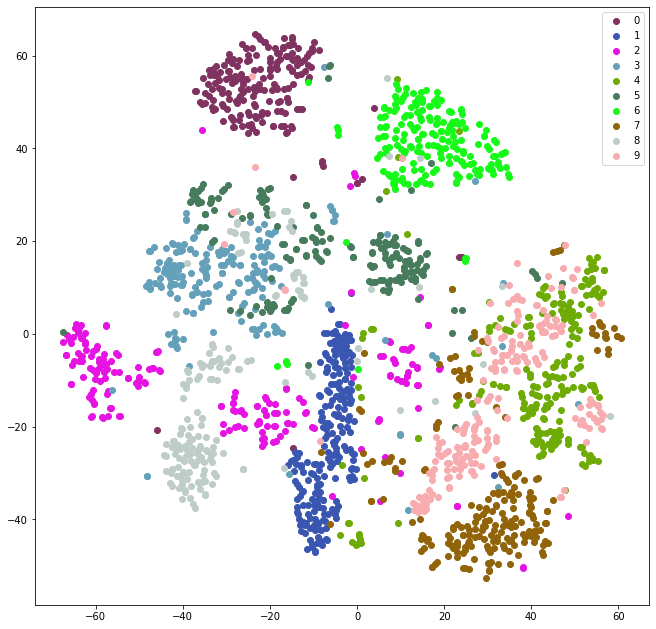

In [24]:
cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04', 
             '#467b5c', '#17fa19', '#926409', '#becdc7', '#f8acaf']

plt.figure(figsize=(11, 11))

plt.scatter(X_2D[y==0, 0], X_2D[y==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X_2D[y==1, 0], X_2D[y==1, 1], c=cmap_bold[1], label='1')
plt.scatter(X_2D[y==2, 0], X_2D[y==2, 1], c=cmap_bold[2], label='2')
plt.scatter(X_2D[y==3, 0], X_2D[y==3, 1], c=cmap_bold[3], label='3')
plt.scatter(X_2D[y==4, 0], X_2D[y==4, 1], c=cmap_bold[4], label='4')
plt.scatter(X_2D[y==5, 0], X_2D[y==5, 1], c=cmap_bold[5], label='5')
plt.scatter(X_2D[y==6, 0], X_2D[y==6, 1], c=cmap_bold[6], label='6')
plt.scatter(X_2D[y==7, 0], X_2D[y==7, 1], c=cmap_bold[7], label='7')
plt.scatter(X_2D[y==8, 0], X_2D[y==8, 1], c=cmap_bold[8], label='8')
plt.scatter(X_2D[y==9, 0], X_2D[y==9, 1], c=cmap_bold[9], label='9')


plt.legend()

plt.show()

Como vemos, este método no nos sirve para visualizar bien. Así que por lo mismo lo vamos a intentar de nuevo con T-SNE.

## T-SNE

T-SNE es un método de reducción de dimensionalidad principalmente usado para hacer visualizaciones en dos dimensiones. Vamos a ver cómo podemos visualizar el _dataset_ MNIST acá.

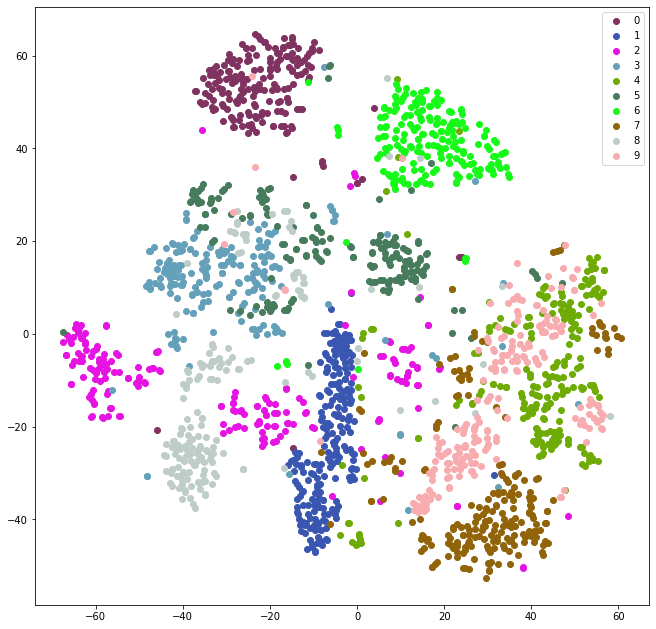

<Figure size 792x792 with 0 Axes>

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_2D = tsne.fit_transform(X)

plt.figure(figsize=(11, 11))

plt.scatter(X_2D[y==0, 0], X_2D[y==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X_2D[y==1, 0], X_2D[y==1, 1], c=cmap_bold[1], label='1')
plt.scatter(X_2D[y==2, 0], X_2D[y==2, 1], c=cmap_bold[2], label='2')
plt.scatter(X_2D[y==3, 0], X_2D[y==3, 1], c=cmap_bold[3], label='3')
plt.scatter(X_2D[y==4, 0], X_2D[y==4, 1], c=cmap_bold[4], label='4')
plt.scatter(X_2D[y==5, 0], X_2D[y==5, 1], c=cmap_bold[5], label='5')
plt.scatter(X_2D[y==6, 0], X_2D[y==6, 1], c=cmap_bold[6], label='6')
plt.scatter(X_2D[y==7, 0], X_2D[y==7, 1], c=cmap_bold[7], label='7')
plt.scatter(X_2D[y==8, 0], X_2D[y==8, 1], c=cmap_bold[8], label='8')
plt.scatter(X_2D[y==9, 0], X_2D[y==9, 1], c=cmap_bold[9], label='9')

plt.legend()

plt.show()

Esta versión se ve mucho mejor, considerando que veníamos de un dataset de 784 _features_.